## 1. Business Understanding

### Objective
Tujuan dari proyek ini adalah untuk menganalisis dan memprediksi siswa putus sekolah berdasarkan fitur demografi, akademik, dan sosial ekonomi. Analisis ini akan membantu lembaga pendidikan mengambil langkah intervensi dini untuk mengurangi angka putus sekolah.

### Pernyataan Masalah
Berdasarkan data siswa, perkirakan apakah siswa akan lulus, putus sekolah, atau tetap terdaftar, dan identifikasi faktor-faktor utama yang berkontribusi terhadap hasil-hasil tersebut.

## 2. Data Understanding & Loading

In [68]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import joblib import dump, load

In [69]:
# Load data from GitHub raw link
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv"
df = pd.read_csv(url, sep=";")

In [70]:
# Display shape and first few rows
df.shape, df.head()

((4424, 37),
    Marital_status  Application_mode  Application_order  Course  \
 0               1                17                  5     171   
 1               1                15                  1    9254   
 2               1                 1                  5    9070   
 3               1                17                  2    9773   
 4               2                39                  1    8014   
 
    Daytime_evening_attendance  Previous_qualification  \
 0                           1                       1   
 1                           1                       1   
 2                           1                       1   
 3                           1                       1   
 4                           0                       1   
 
    Previous_qualification_grade  Nacionality  Mothers_qualification  \
 0                         122.0            1                     19   
 1                         160.0            1                      1   
 2               

## 3. Data Cleaning

In [71]:
# Check for null values
df.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [72]:
# Check data types
df.dtypes

,0
Marital_status,int64
Application_mode,int64
Application_order,int64
Course,int64
Daytime_evening_attendance,int64
Previous_qualification,int64
Previous_qualification_grade,float64
Nacionality,int64
Mothers_qualification,int64
Fathers_qualification,int64


## 4. Exploratory Data Analysis (EDA)

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

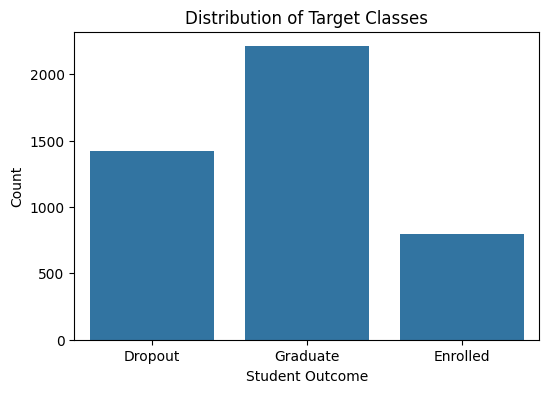

In [73]:
# Check column names
print(df.columns)

# Visualize the target variable (before encoding)
plt.figure(figsize=(6, 4))
sns.countplot(x='Status', data=df)
plt.title('Distribution of Target Classes')
plt.xlabel('Student Outcome')
plt.ylabel('Count')
plt.show()

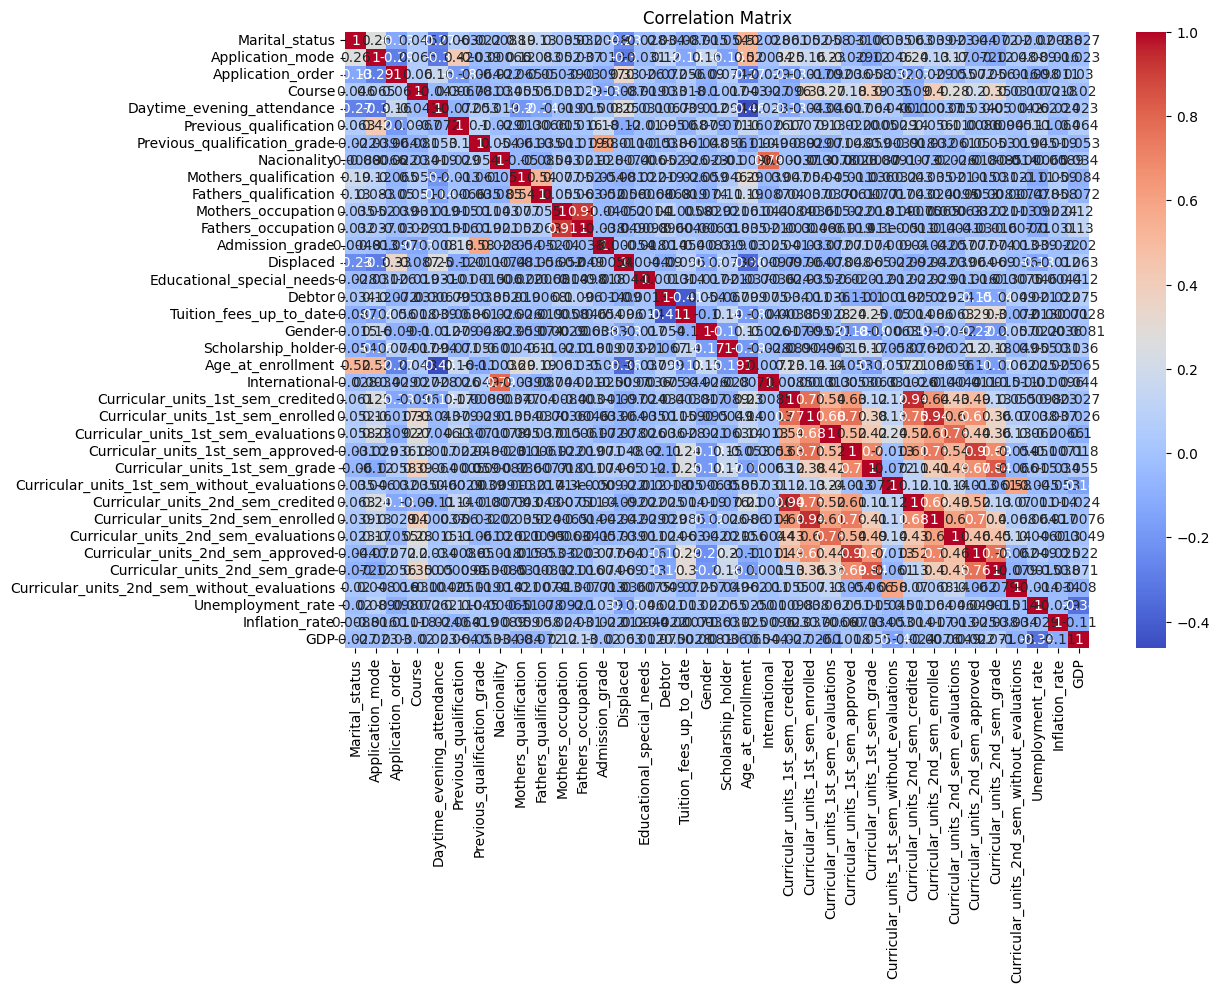

In [74]:
# Correlation heatmap of numerical features
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 5. Feature Engineering

In [75]:
# One-hot encode categorical variables (excluding target)
df_encoded = pd.get_dummies(df.drop('Status', axis=1), drop_first=True)
df_encoded['Status'] = df['Status']

# Save the feature columns used during training
feature_names = X.columns.tolist()
joblib.dump(feature_names, '/content/model/feature_names.pkl')

['/content/model/feature_names.pkl']

In [76]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
df_encoded['Status'] = le.fit_transform(df_encoded['Status'])

# Save the label encoder to decode later if needed
joblib.dump(le, "model/label_encoder.pkl")

['model/label_encoder.pkl']

In [77]:
# Split features and target
X = df_encoded.drop('Status', axis=1)
y = df_encoded['Status']

In [78]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [79]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
# Apply SMOTE for balancing
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

## 6. Modeling

In [81]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_lambda': [1, 1.5, 2]
}

xgb = XGBClassifier(random_state=42)
rs = RandomizedSearchCV(xgb, param_distributions=params, n_iter=30, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
rs.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.7, 0.8, 1.0]},
                   scoring='accuracy', verbose=1)

In [82]:
# print the best parameter
print("Best score:", rs.best_score_)
print("Best params:", rs.best_params_)

Best score: 0.8587247701527574
Best params: {'subsample': 0.7, 'reg_lambda': 1, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.6}


In [63]:
# # get the best parameter

# print("best parameters: ", grid_search.best_params_)

best parameters:  {'colsample_bytree': 1.0, 'criterion': 'gini', 'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.8}


In [83]:
# Use the best estimator
best_model = rs.best_estimator_

In [84]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print("CV Accuracy:", scores.mean())

CV Accuracy: 0.77892987703556


In [64]:
# from joblib import dump, load

# # re-initialize and train the model
# model = XGBClassifier(
#     random_state=123,
#     colsample_bytree=1.0,
#     learning_rate=0.05,
#     max_depth=9,
#     n_estimators=300,
#     subsample=0.8,
#     eval_metric='mlogloss'
# )

# model.fit(X_train_resampled, y_train_resampled)

# # Save the trained model
# dump(model, "/content/model/model.pkl")

['/content/model/model.joblib']

In [85]:
# Save the trained model
dump(model, "/content/model/model.pkl")

['/content/model/model.pkl']

In [86]:
joblib.dump(scaler, '/content/model/scaler.pkl')

['/content/model/scaler.pkl']

## 7. Evaluation

In [87]:
from joblib import load
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the model
rs = load("/content/model/model.pkl")

# Predict
y_pred = rs.predict(X_test_scaled)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.74      0.77       284
           1       0.55      0.50      0.52       159
           2       0.82      0.89      0.85       442

    accuracy                           0.77       885
   macro avg       0.72      0.71      0.72       885
weighted avg       0.77      0.77      0.77       885

Confusion Matrix:
 [[211  32  41]
 [ 35  79  45]
 [ 16  33 393]]
Accuracy Score: 0.7717514124293785


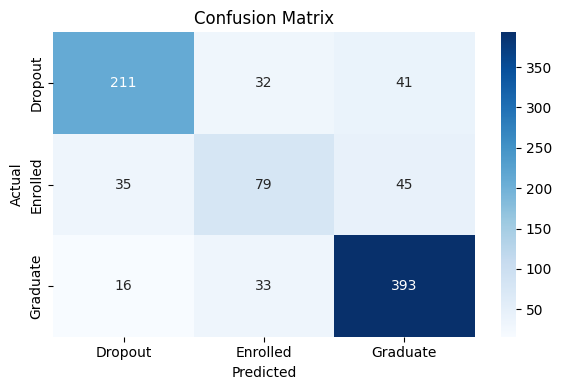

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [89]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [90]:
joblib.dump(model, "model.pkl")
joblib.dump(list(X_train.columns), "feature_names.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']